In [125]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

dataset = pd.read_csv('../data/dataset (13).csv')
# Misal dataset yang kamu punya
dataset['timeStamps'] = pd.to_datetime(dataset['timeStamps'])
df_chg= dataset.set_index(['timeStamps'], drop=True)

# Pilih fitur yang mau kita gunakan (termasuk bandwidthSpeeds, bufferingEvents, dsb.)
features = df_chg[[ 'bandwidthSpeeds', 'oldBitrates', 'streamBandwidths', 
                    'estimatedBandwidths', "bufferingEvents"]]
target = df_chg['newBitrates']  # Target prediksi

# Scaling semua fitur ke range 0-1
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

# Scaling target juga
scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Membagi data jadi training dan testing (70% training, 30% testing)
train_features, test_features, train_target, test_target = train_test_split(
    features_scaled, target_scaled, test_size=0.2, shuffle=False)

# Fungsi untuk membuat sequences (LSTM butuh data urutan)
def create_sequences(data, target, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i + sequence_length]
        y = target[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Buat sequence dengan panjang 10 (misalnya)
sequence_length = 5
X_train, y_train = create_sequences(train_features, train_target, sequence_length)
X_test, y_test = create_sequences(test_features, test_target, sequence_length)

# Cek shape data hasil preprocessing
print(X_train.shape, y_train.shape) 
# Hasilnya harus dalam bentuk (samples, timesteps, features)
dataset


SyntaxError: expected argument value expression (3823555269.py, line 11)

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Membuat model LSTM
model = Sequential()

# Tambah layer LSTM
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Tambah output layer (Dense)
model.add(Dense(1))  # Karena kita hanya prediksi satu nilai (newBitrates)

# Compile model
model.compile(optimizer='adam', loss='mse')  # Loss-nya Mean Squared Error (MSE)

# Lihat ringkasan model
model.summary()


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# Melatih model
history = model.fit(X_train, y_train, epochs=200,batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 8.5322e-04
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0012
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - val_loss: 0.0013
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0013
Epoch 10/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 11/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 12/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

In [117]:
# Evaluasi model dengan data testing
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Prediksi dengan data testing
predictions = model.predict(X_test)

# Inverse transform untuk mengembalikan ke skala asli
predictions = scaler_target.inverse_transform(predictions)
y_test_original = scaler_target.inverse_transform(y_test)

# Plot hasil prediksi vs target asli

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 
Test Loss: 0.0024429040495306253
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


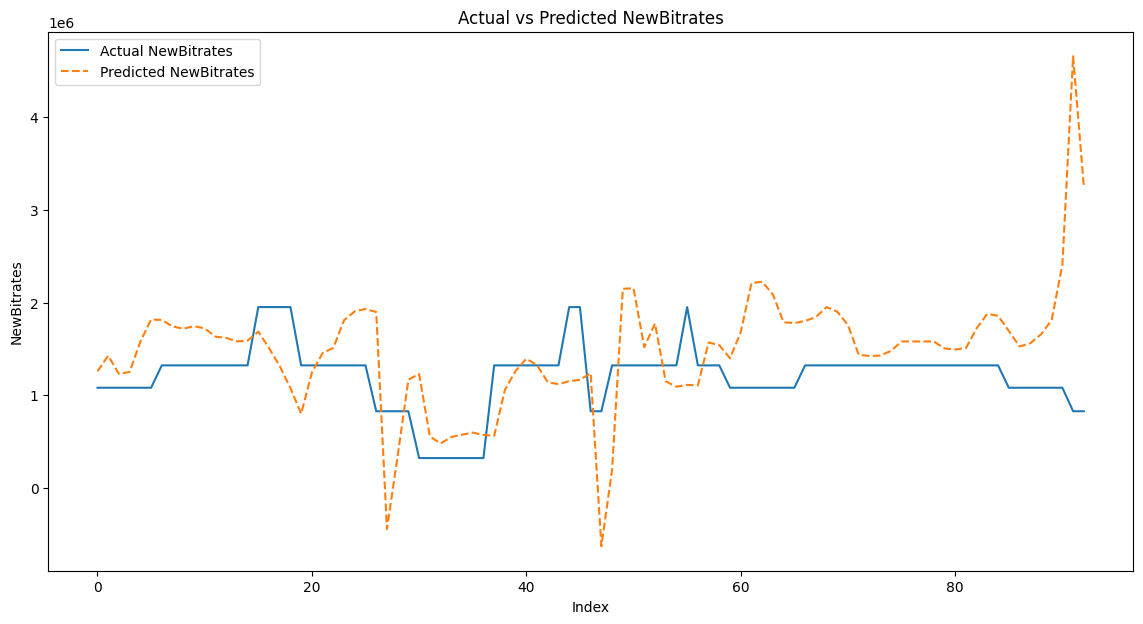

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual NewBitrates')
plt.plot(predictions, label='Predicted NewBitrates', linestyle='--')
plt.xlabel('Index')
plt.ylabel('NewBitrates')
plt.title('Actual vs Predicted NewBitrates')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prediksi dengan data testing
predictions = model.predict(X_test)

# Inverse transform prediksi dan y_test ke skala asli
predictions = scaler_target.inverse_transform(predictions)
y_test_original = scaler_target.inverse_transform(y_test)

# Hitung MSE, MAE, RMSE, dan R-Squared
mse = mean_squared_error(y_test_original, predictions)
mae = mean_absolute_error(y_test_original, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
MSE: 526252129753.16724
MAE: 518123.8571908602
RMSE: 725432.3743486827
R-Squared: -3.253411926270579


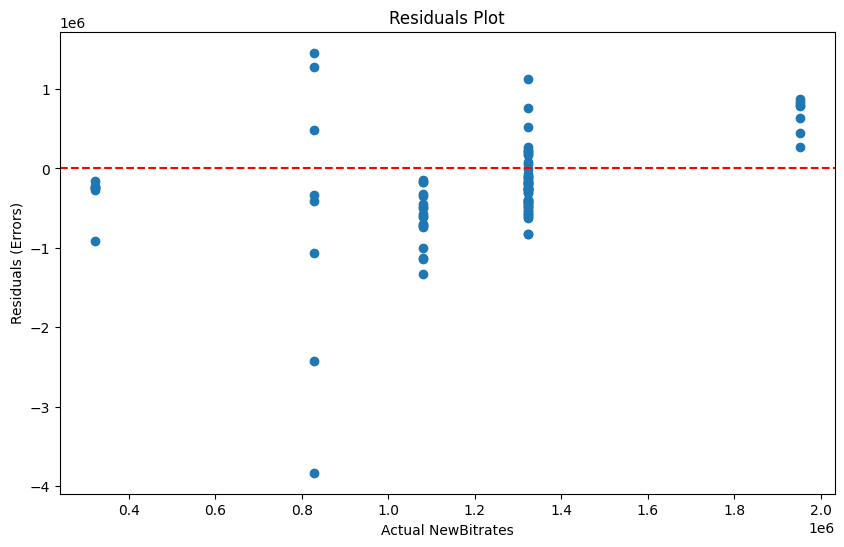

In [121]:
residuals = y_test_original - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual NewBitrates')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals Plot')
plt.show()


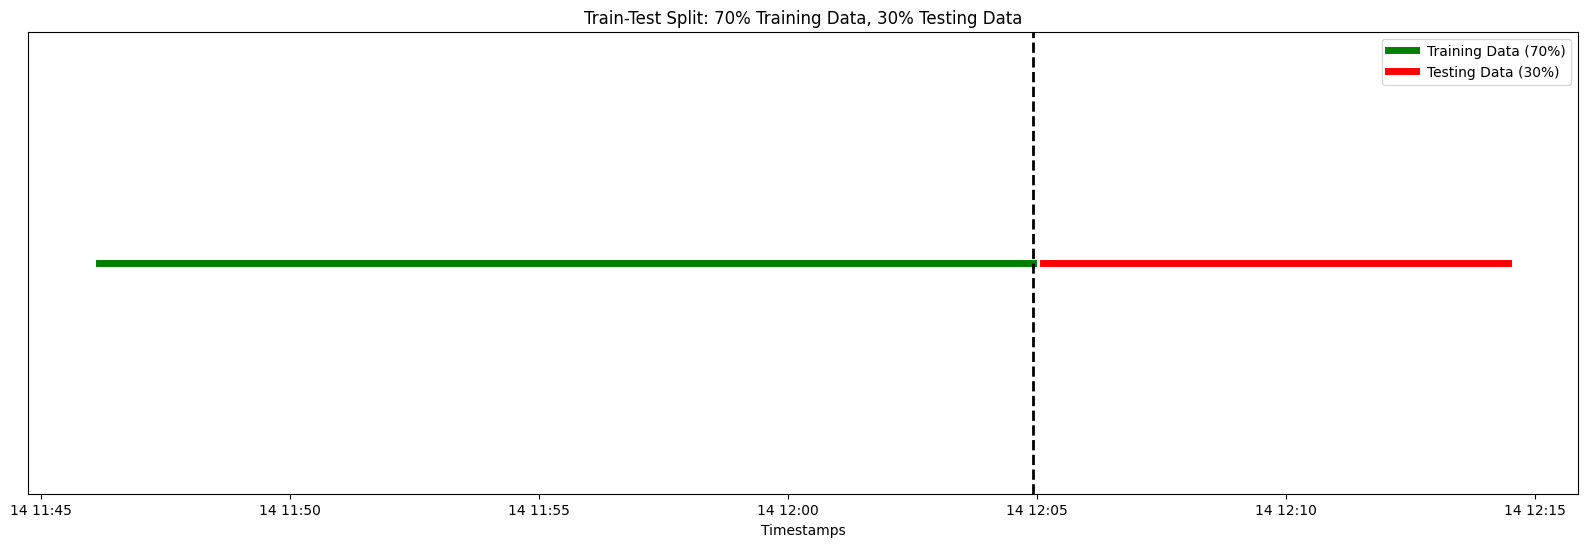

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya dataset udah di-convert timestamp-nya
dataset['timeStamps'] = pd.to_datetime(dataset['timeStamps'])

# Split data jadi training (70%) dan testing (30%)
train_size = 0.7
train_index = int(len(dataset) * train_size)

train_data = dataset.iloc[:train_index]
test_data = dataset.iloc[train_index:]

# Plot keseluruhan data berdasarkan timeStamps
plt.figure(figsize=(20, 6))

# Plot data training (warna hijau)
plt.plot(train_data['timeStamps'], [1] * len(train_data), label='Training Data (70%)', color='green', lw=5)

# Plot data testing (warna merah)
plt.plot(test_data['timeStamps'], [1] * len(test_data), label='Testing Data (30%)', color='red', lw=5)

# Tambah garis vertikal untuk menandai batas antara training dan testing
plt.axvline(x=train_data['timeStamps'].iloc[-1], color='black', linestyle='--', lw=2)

# Tambah label dan judul
plt.xlabel('Timestamps')
plt.title('Train-Test Split: 70% Training Data, 30% Testing Data')

# Hilangin sumbu y (karena kita gak butuh)
plt.yticks([])

# Tambah legend
plt.legend()
plt.show()
